In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [ ]:
y1 = pd.read_csv("1.txt", header = None)
y2 = pd.read_csv("2.txt", header = None)

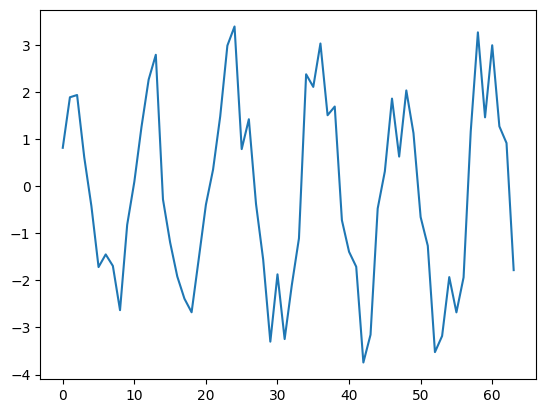

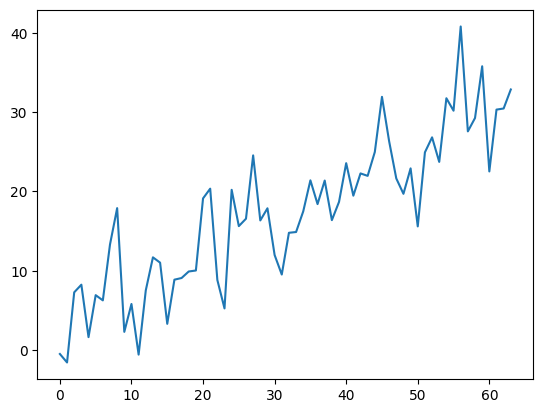

In [ ]:
x1 = [i for i in range(len(y1))]
x2 = [i for i in range(len(y2))]
plt.plot(x1, y1)
plt.show()
plt.plot(x2, y2)
plt.show()

In [ ]:
def sma(data, m):
    data = np.array(data)
    w = 1 / (2 * m + 1)
    data1 = [data[0]] * m
    data1.extend(data)
    data1 += [data[-1]] * m
    result = []
    for i in range(m, len(data1) - m):
        smoothed_value = 0
        for j in range(-m, m+1):
            smoothed_value += w * data1[i + j]
        result.append(smoothed_value)
    return result

In [ ]:
def wma(data, m):
    data = np.array(data)
    eps = 0.3
    w = []
    data1 = [data[0]] * m
    data1.extend(data)
    data1 += [data[-1]] * m
    result = []
    for i in range(m, len(data1) - m):
        smoothed_value = 0
        sum_e = 0
        for j in range(-m, m+1):
            sum_e += np.exp(-eps*i)
        w.append(np.exp(-eps*i)/sum_e)
        for j in range(-m, m+1):
            smoothed_value += w[-1] * data1[i + j]
        result.append(smoothed_value)
    return result

In [ ]:
def ema(data, alpha):
    data = np.array(data)
    smoothed_data = np.zeros(len(data))
    smoothed_data[0] = data[0]
    for t in range(1, len(data)):
        smoothed_data[t] = alpha * data[t] + (1 - alpha) * smoothed_data[t-1]
    return smoothed_data

In [ ]:
def dema(data, alpha, beta):
    data = np.array(data)

    ema = np.zeros(len(data))
    dema = np.zeros(len(data))

    ema[0] = data[0]
    for t in range(1, len(data)):
        ema[t] = alpha * data[t] + (1 - alpha) * ema[t-1]

    ema_of_ema = np.zeros(len(data))
    ema_of_ema[0] = ema[0]
    for t in range(1, len(data)):
        ema_of_ema[t] = beta * ema[t] + (1 - beta) * ema_of_ema[t-1]

    for t in range(len(data)):
        dema[t] = 2 * ema[t] - ema_of_ema[t]

    return dema

In [ ]:
def lbq(data, lag=5):
    mean = np.mean(data)
    var = np.var(data)
    q = 0
    for i in range(1, lag + 1):
        rho = np.sum((data[i:] - mean) * (data[:-i] - mean)) / np.sum((data - mean) ** 2)
        q += (rho ** 2) / (len(data) - i)
    q *= len(data) * (len(data) + 2)
    return q


def optimal_param(data, method, params, lag=5):
    data = np.array(data)
    best_param = None
    critical_value = stats.chi2.ppf(0.95, lag)
    print('critical_value =', critical_value)
    q = []
    for param in params:
        if method == 'sma':
            smoothed = sma(data, param)
            residuals = data - smoothed
            q.append(lbq(residuals, lag))
            print('parametr =', param, ' q-statistics =', q[-1], '')
        elif method == 'wma':
            smoothed = wma(data, param)
            residuals = data - smoothed
            q.append(lbq(residuals, lag))
            print('parametr =', param, ' q-statistics =', q[-1], '')
        elif method == 'ema':
            smoothed = ema(data, param)
            residuals = data - smoothed
            q.append(lbq(residuals, lag))
            print('parametr =', param, ' q-statistics =', q[-1], '')
        elif method == 'dema':
            for param2 in params:
                smoothed = dema(data, param, param2)
                residuals = data - smoothed
                q.append(lbq(residuals, lag))

    if method == 'dema':
        print('optimal alpha =', params[q.index(min(q)) // len(params)])
        print('optimal gamma =', params[q.index(min(q)) % len(params)])
        print('q-statistics = ', min(q))
    else:
        print('optimal parametr =', params[q.index(min(q))])

In [ ]:
optimal_param(y1, 'sma', [3, 5, 7, 9])

critical_value = 11.070497693516351
parametr = 3  q-statistics = 39.662228509168756 
parametr = 5  q-statistics = 94.40734367917422 
parametr = 7  q-statistics = 105.24724995654951 
parametr = 9  q-statistics = 101.90338583801385 
optimal parametr = 3


In [ ]:
optimal_param(y1, 'wma', [3, 5, 7, 9])

critical_value = 11.070497693516351
parametr = 3  q-statistics = 39.662228509168735 
parametr = 5  q-statistics = 94.4073436791742 
parametr = 7  q-statistics = 105.24724995654951 
parametr = 9  q-statistics = 101.9033858380138 
optimal parametr = 3


In [ ]:
optimal_param(y1, 'ema', np.arange(0.1, 1, 0.1))

critical_value = 11.070497693516351
parametr = 0.1  q-statistics = 84.04619892214077 
parametr = 0.2  q-statistics = 75.15537096641242 
parametr = 0.30000000000000004  q-statistics = 72.02717294941458 
parametr = 0.4  q-statistics = 75.10405827005178 
parametr = 0.5  q-statistics = 80.62242306271763 
parametr = 0.6  q-statistics = 86.17724270215085 
parametr = 0.7000000000000001  q-statistics = 90.98517847921359 
parametr = 0.8  q-statistics = 95.01608295801347 
parametr = 0.9  q-statistics = 98.47374314448332 
optimal parametr = 0.30000000000000004


In [ ]:
optimal_param(y1, 'dema', np.arange(0.1, 1, 0.1))

critical_value = 11.070497693516351
optimal alpha = 0.2
optimal gamma = 0.4
q-statistics =  72.04871610107683


In [ ]:
optimal_param(y2, 'sma', [3, 5, 7, 9])

critical_value = 11.070497693516351
parametr = 3  q-statistics = 11.518910831968704 
parametr = 5  q-statistics = 13.530515479364368 
parametr = 7  q-statistics = 9.375620165647538 
parametr = 9  q-statistics = 6.66734273470295 
optimal parametr = 9


In [ ]:
optimal_param(y2, 'wma', [3, 5, 7, 9])

critical_value = 11.070497693516351
parametr = 3  q-statistics = 11.518910831968707 
parametr = 5  q-statistics = 13.530515479364373 
parametr = 7  q-statistics = 9.375620165647545 
parametr = 9  q-statistics = 6.667342734702932 
optimal parametr = 9


In [ ]:
optimal_param(y2, 'ema', np.arange(0.1, 1, 0.1))

critical_value = 11.070497693516351
parametr = 0.1  q-statistics = 204.11239064778053 
parametr = 0.2  q-statistics = 208.1305114734761 
parametr = 0.30000000000000004  q-statistics = 209.35075152024208 
parametr = 0.4  q-statistics = 210.29685516799552 
parametr = 0.5  q-statistics = 211.26206848048608 
parametr = 0.6  q-statistics = 212.31766031336386 
parametr = 0.7000000000000001  q-statistics = 213.48739040561873 
parametr = 0.8  q-statistics = 214.78640877550095 
parametr = 0.9  q-statistics = 216.23577109847503 
optimal parametr = 0.1


In [ ]:
optimal_param(y2, 'dema', np.arange(0.1, 1, 0.1))

critical_value = 11.070497693516351
optimal alpha = 0.1
optimal gamma = 0.9
q-statistics =  204.16208801334253


# Тест Дарбина-Уотсона

In [ ]:
def darbin_watson_test(data, method, param):
    data = np.array(data)
    if method == 'sma':
        smoothed = sma(data, param)
    if method == 'wma':
        smoothed = wma(data, param)
    if method == 'ema':
        smoothed = ema(data, param)
    if method == 'dema':
        smoothed = dema(data, param[0], param[1])
    residuals = data - smoothed
    d = np.sum(np.diff(residuals) ** 2) / np.sum(residuals ** 2)
    if d >= 0 and d <= 2:
        d_new = d
    if d > 2 and d <= 4:
        d_new = 4 - d
    d_l = 1.567
    d_u = 1.629
    if d_new >= 0 and d_new < d_l:
        print('Положительная автокорреляция')
    if d_new >= d_l and d_new < d_u:
        print('Неопределенность')
    if d_new >= d_u:
        print('Автокорреляция отсутствует')

    return d, d_new

In [ ]:
print(darbin_watson_test(y1, 'sma', 3))
print(darbin_watson_test(y1, 'wma', 3))
print(darbin_watson_test(y1, 'ema', 0.1))
print(darbin_watson_test(y1, 'dema', [0.1, 0.9]))

Положительная автокорреляция
(0.0, 0.0)
Положительная автокорреляция
(0.0, 0.0)
Положительная автокорреляция
(0.01006325244485649, 0.01006325244485649)
Положительная автокорреляция
(0.01075104287058291, 0.01075104287058291)


In [ ]:
print(darbin_watson_test(y2, 'sma', 3))
print(darbin_watson_test(y2, 'wma', 3))
print(darbin_watson_test(y2, 'ema', 0.3))
print(darbin_watson_test(y2, 'dema', [0.2, 0.4]))

Положительная автокорреляция
(0.0, 0.0)
Положительная автокорреляция
(0.0, 0.0)
Положительная автокорреляция
(0.015372422762166976, 0.015372422762166976)
Положительная автокорреляция
(0.017409802762595454, 0.017409802762595454)


In [ ]:
def create_plot(x, y, x_sma, y_sma):
    plt.plot(x, y)
    plt.plot(x_sma, y_sma, color = 'r')
    plt.grid()
    plt.show()

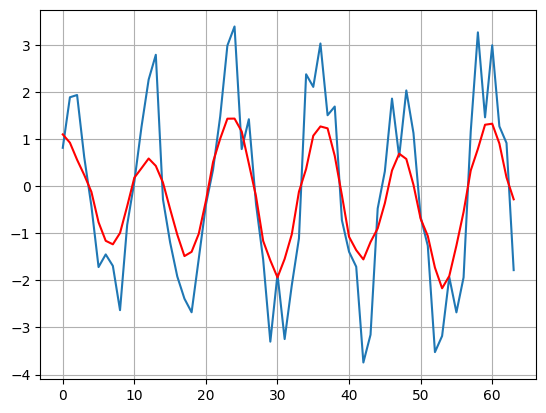

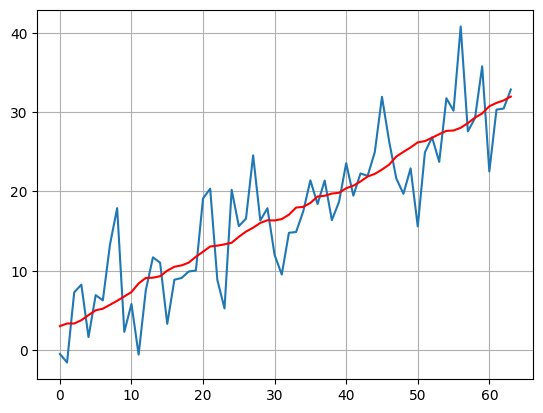

In [ ]:
y_sma = sma(y1, 3)
x1 = [i for i in range(len(y1))]
x_sma = [i for i in range(len(y_sma))]
create_plot(x1, y1, x_sma, y_sma)

y_sma = sma(y2, 9)
x2 = [i for i in range(len(y2))]
x_sma = [i for i in range(len(y_sma))]
create_plot(x2, y2, x_sma, y_sma)

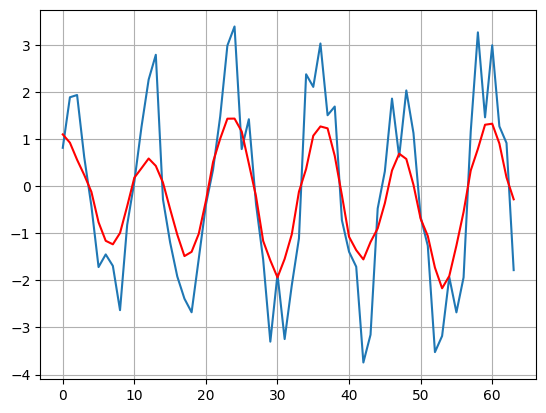

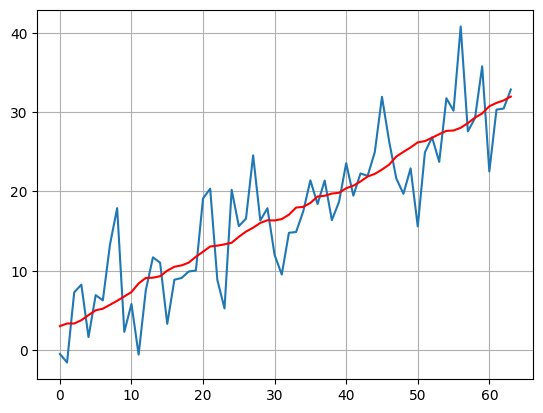

In [ ]:
y_wma = wma(y1, 3)
x1 = [i for i in range(len(y1))]
x_wma = [i for i in range(len(y_wma))]
create_plot(x1, y1, x_wma, y_wma)

y_wma = wma(y2, 9)
x2 = [i for i in range(len(y2))]
x_wma = [i for i in range(len(y_wma))]
create_plot(x2, y2, x_wma, y_wma)

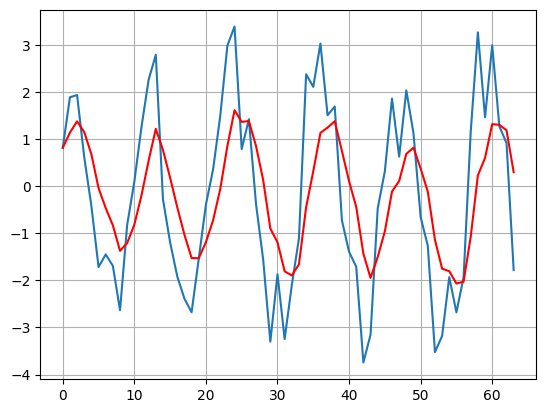

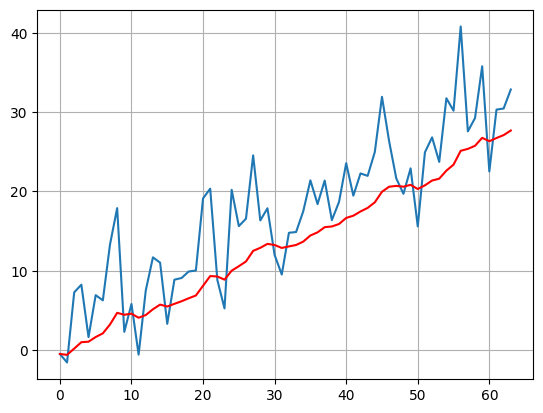

In [ ]:
y_ema = ema(y1, 0.3)
x1 = [i for i in range(len(y1))]
x_ema = [i for i in range(len(y_ema))]
create_plot(x1, y1, x_ema, y_ema)

y_ema = ema(y2, 0.1)
x2 = [i for i in range(len(y2))]
x_ema = [i for i in range(len(y_ema))]
create_plot(x2, y2, x_ema, y_ema)

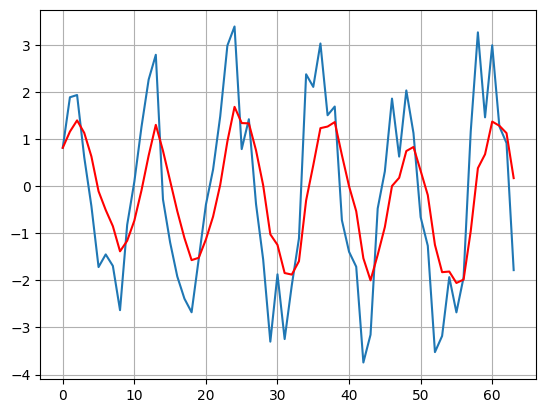

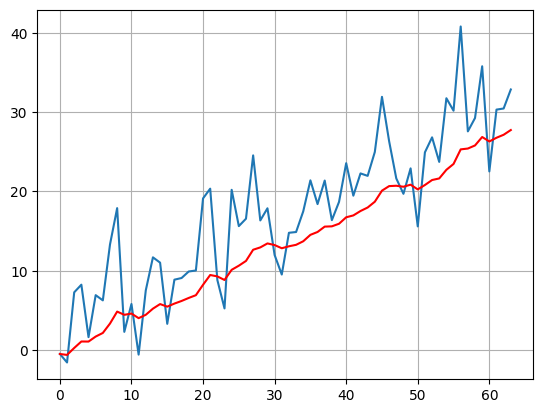

In [ ]:
y_dema = dema(y1, 0.2, 0.4)
x1 = [i for i in range(len(y1))]
x_dema = [i for i in range(len(y_dema))]
create_plot(x1, y1, x_dema, y_dema)

y_dema = dema(y2, 0.1, 0.9)
x2 = [i for i in range(len(y2))]
x_dema = [i for i in range(len(y_dema))]
create_plot(x2, y2, x_dema, y_dema)